In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
import struct
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.animation import FuncAnimation
import requests


In [2]:
import astroquery.jplhorizons as jpl

# Get the vector data for Voyager 1 from JPL Horizons
# using Sun barycenter as the center of the coordinate system
# and the J2000.0 reference frame.

object = jpl.Horizons(id='Voyager 1', location='500@0', epochs={'start':'1977-Sep-06', 'stop':'2023-10-23', 'step':'1months'})
object.vectors()

<Table masked=True length=554>
         targetname          datetime_jd ...       range_rate     
            ---                   d      ...         AU / d       
           str28               float64   ...        float64       
---------------------------- ----------- ... ---------------------
Voyager 1 (spacecraft) (-31)   2443392.5 ... 0.0001803328646763275
Voyager 1 (spacecraft) (-31)   2443422.5 ...  0.006181241439451142
Voyager 1 (spacecraft) (-31)   2443453.5 ...  0.009212659784235053
Voyager 1 (spacecraft) (-31)   2443483.5 ...   0.01008354996295849
Voyager 1 (spacecraft) (-31)   2443514.5 ...   0.01011716181328669
Voyager 1 (spacecraft) (-31)   2443545.5 ...  0.009832621290309032
Voyager 1 (spacecraft) (-31)   2443573.5 ...  0.009484382444625565
Voyager 1 (spacecraft) (-31)   2443604.5 ...  0.009075544018146756
Voyager 1 (spacecraft) (-31)   2443634.5 ...   0.00868691098737837
                         ...         ... ...                   ...
Voyager 1 (spacecraft) (-31)   2459950.5 ...  0.009757871819694773
Voyager 1 (spacecraft) (-31)   2459981.5 ...  0.009757602921283477
Voyager 1 (spacecraft) (-31)   2460009.5 ...   0.00975736075819726
Voyager 1 (spacecraft) (-31)   2460040.5 ...  0.009757093439587252
Voyager 1 (spacecraft) (-31)   2460070.5 ...  0.009756835538385144
Voyager 1 (spacecraft) (-31)   2460101.5 ...  0.009756569864891606
Voyager 1 (spacecraft) (-31)   2460131.5 ...  0.009756313561269494
Voyager 1 (spacecraft) (-31)   2460162.5 ...  0.009756049539551464
Voyager 1 (spacecraft) (-31)   2460193.5 ...  0.009755786351891267
Voyager 1 (spacecraft) (-31)   2460223.5 ...  0.009755532440423272

In [4]:
getData = object.vectors()
dData = {
        "time":np.empty(len(getData)),
        "xCoord":np.empty(len(getData)),
        "yCoord":np.empty(len(getData)),
        "zCoord":np.empty(len(getData))
    }

for i in range(len(getData)):
    dData["time"][i] = getData[i][1]
    dData["xCoord"][i] = getData[i][3]
    dData["yCoord"][i] = getData[i][4]
    dData["zCoord"][i] = getData[i][5]
    

In [5]:
len(dData)
fun_colors = ('RdPu') 
color_split = cm.get_cmap(fun_colors, len(dData["time"]))
c_values = [color_split(i) for i in range(len(dData["time"]))]
print(c_values)

[(1.0, 0.9686274509803922, 0.9529411764705882, 1.0), (0.9998865368932383, 0.9673226252526327, 0.9516930822962095, 1.0), (0.9997730737864766, 0.9660177995248732, 0.950444988121831, 1.0), (0.9996596106797149, 0.9647129737971137, 0.9491968939474523, 1.0), (0.9995461475729532, 0.9634081480693544, 0.9479487997730738, 1.0), (0.9994326844661915, 0.9621033223415949, 0.9467007055986951, 1.0), (0.9993192213594299, 0.9607984966138354, 0.9454526114243165, 1.0), (0.9992057582526681, 0.959493670886076, 0.9442045172499379, 1.0), (0.9990922951459065, 0.9581888451583165, 0.9429564230755593, 1.0), (0.9989788320391447, 0.956884019430557, 0.9417083289011807, 1.0), (0.9988653689323831, 0.9555791937027975, 0.9404602347268021, 1.0), (0.9987519058256213, 0.9542743679750381, 0.9392121405524234, 1.0), (0.9986384427188597, 0.9529695422472787, 0.9379640463780449, 1.0), (0.998524979612098, 0.9516647165195192, 0.9367159522036662, 1.0), (0.9984115165053363, 0.9503598907917598, 0.9354678580292877, 1.0), (0.9982980533

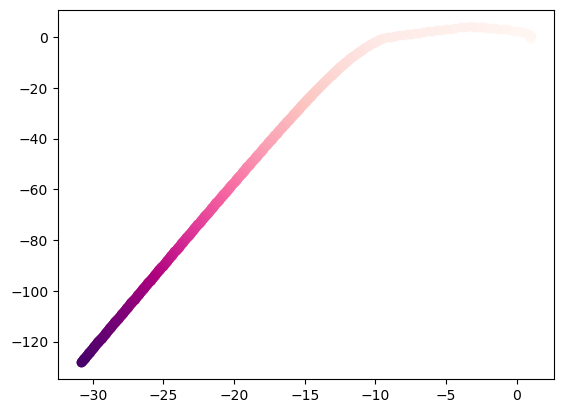

In [6]:
for i in range(len(dData["time"])):
    #print(dData["yCoord"][i],dData["xCoord"][i])
    plt.scatter(dData["xCoord"][i],dData["yCoord"][i], color = c_values[i])
#plt.show()

In [6]:
len(dData['time'])

554

In [7]:
fun_colors = ('RdPu') 
color_split = cm.get_cmap(fun_colors, len(dData['time']))
c_values = [color_split(i) for i in range(len(dData['time']))]

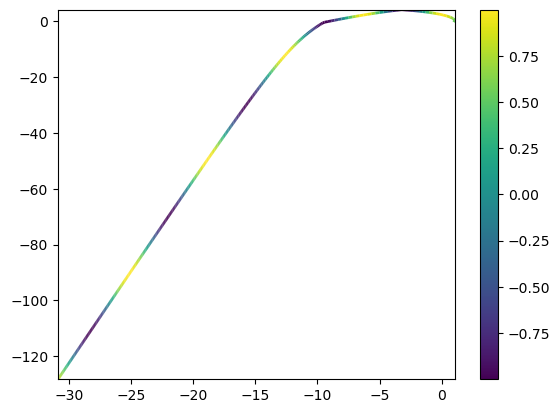

In [8]:
x = dData["xCoord"]
y = dData["yCoord"]
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

# Use a boundary norm instead


axs.set_xlim(x.min(), x.max())
axs.set_ylim(y.min(), y.max())
plt.show()

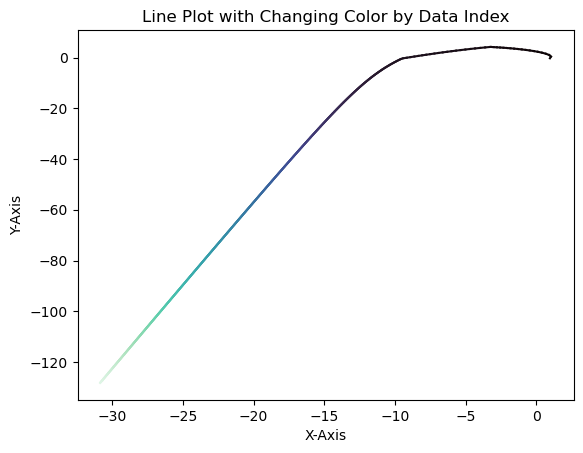

In [9]:
x = dData["xCoord"]
y = dData["yCoord"]

# Create a colormap (e.g., viridis)
cmap = plt.get_cmap('mako')

# Create a figure and axis
fig, ax = plt.subplots()

# Loop through the data and plot segments with varying colors
for i in range(len(x) - 1):
    color = cmap(i / (len(x) - 1))  # Map data index to color using the colormap
    ax.plot(x[i:i+2], y[i:i+2], color=color)

# Add labels and title
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_title('Line Plot with Changing Color by Data Index')

# Show the plot
plt.show()

C:\Users\moore\AppData\Local\Temp\ipykernel_21832\3065127777.py:10: RuntimeWarning: invalid value encountered in log10
  x_trajectory = abs(np.log10(x_coordinates))
C:\Users\moore\AppData\Local\Temp\ipykernel_21832\3065127777.py:11: RuntimeWarning: invalid value encountered in log10
  y_trajectory = abs(np.log10(y_coordinates))
C:\Users\moore\AppData\Local\Temp\ipykernel_21832\3065127777.py:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0, 2)  # Adjust the limits based on your data
C:\Users\moore\AppData\Local\Temp\ipykernel_21832\3065127777.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 2)  # Adjust the limits based on your data


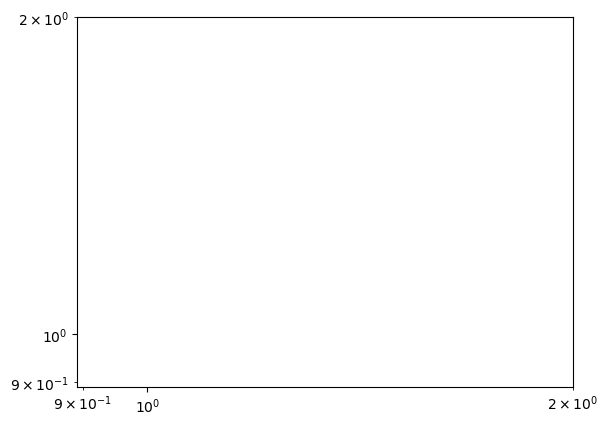

In [10]:
# Create x and y coordinate arrays for the trajectory
x = dData["xCoord"]
y = dData["yCoord"]
r = np.hypot(x, y)  # Calculate the magnitude (distance from the origin)
theta = np.arctan2(y, x)  # Calculate the angle in radians
x_coordinates = dData["xCoord"]  # Replace with your raw x-coordinate data
y_coordinates = dData["yCoord"]  # Replace with your raw y-coordinate data

# Apply logarithmic transformation to the coordinates
x_trajectory = abs(np.log10(x_coordinates))
y_trajectory = abs(np.log10(y_coordinates))

# Create figure and axes
fig, ax = plt.subplots()
trajectory_line, = ax.loglog([], [], 'b-')  # Create a log-log line for the trajectory
current_point, = ax.loglog([], [], 'ro')    # Create a log-log point to represent the evolving position

# Set axis limits
ax.set_xlim(0, 2)  # Adjust the limits based on your data
ax.set_ylim(0, 2)  # Adjust the limits based on your data

# Initialization function
def init():
    trajectory_line.set_data([], [])         # Initialize the log-log trajectory line
    current_point.set_data([], [])           # Initialize the log-log current position point
    return trajectory_line, current_point

# Update function
def update(frame):
    x = x_trajectory[:frame + 1]            # Get the x coordinates up to the current frame
    y = y_trajectory[:frame + 1]            # Get the corresponding y coordinates

    trajectory_line.set_data(x, y)          # Update the log-log trajectory line
    current_x = x[-1]                       # Get the x coordinate at the current frame
    current_y = y[-1]                       # Get the corresponding y coordinate
    current_point.set_data(current_x, current_y)  # Update the log-log current position point

    return trajectory_line, current_point

# Create animation
ani = FuncAnimation(fig, update, frames=len(x_trajectory), init_func=init, blit=True)

# Display the animation in a Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

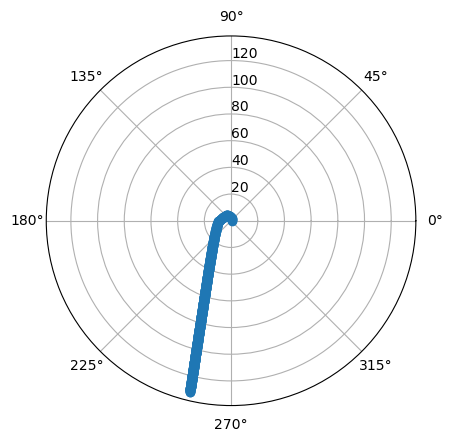

In [15]:
x = dData["xCoord"]
y = dData["yCoord"]
r = np.hypot(x, y)  # Calculate the magnitude (distance from the origin)
theta = np.arctan2(y, x)  # Calculate the angle in radians
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r, marker='o')  # Plot the polar data with markers
ax.set_rlabel_position(90)  # Set radial labels position (optional)

plt.show()  # Display the polar plot

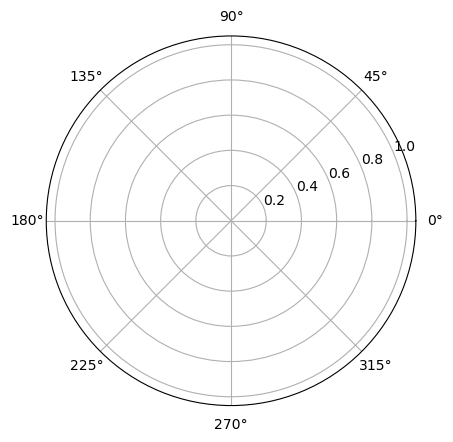

In [19]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Create x and y coordinate arrays for the trajectory
x_trajectory = dData["xCoord"]
y_trajectory = dData["yCoord"]
r = np.hypot(x_trajectory, y_trajectory)  # Calculate the magnitude (distance from the origin)
theta = np.arctan2(y_trajectory, x_trajectory)  # Calculate the angle in radians

# Create figure and axes
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#ax.plot(theta, r, marker='o')  # Plot the polar data with markers
#ax.set_rlabel_position(90)  # Set radial labels position (optional)
trajectory_line, = ax.plot([], [], 'b-')    # Create a line for the trajectory
current_point, = ax.plot([], [], 'ro')      # Create a point to represent the evolving position

# Set axis limits
ax.set_xlim(theta.min(), x_trajectory.max())  # Adjust the limits based on your data
ax.set_ylim(r_trajectory.min(), y_trajectory.max())

# Initialization function
def init():
    trajectory_line.set_data([], [])         # Initialize the trajectory line
    current_point.set_data([], [])           # Initialize the current position point
    return trajectory_line, current_point

# Update function
def update(frame):
    r_traj = r[:frame + 1]            # Get the x coordinates up to the current frame
    theta_traj = theta[:frame + 1]            # Get the corresponding y coordinates

    trajectory_line.set_data(theta_traj, r_traj)          # Update the trajectory line
    current_x = theta_traj[-1]                       # Get the x coordinate at the current frame
    current_y = r_traj[-1]                       # Get the corresponding y coordinate
    current_point.set_data(current_x, current_y)  # Update the current position point

    return trajectory_line, current_point

# Create animation
ani = FuncAnimation(fig, update, frames=len(x_trajectory), init_func=init, blit=True)
plt.show()
# Display the animation in a Jupyter Notebook
#from IPython.display import HTML
#HTML(ani.to_jshtml())

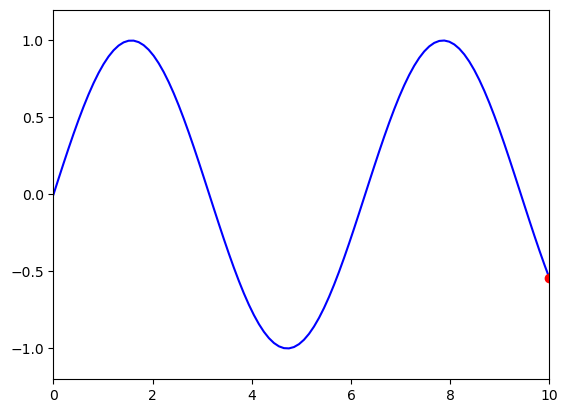

In [9]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Create x and y coordinate arrays for the trajectory
x_trajectory = np.linspace(0, 10, 100)
y_trajectory = np.sin(x_trajectory)

# Create figure and axes
fig, ax = plt.subplots()
trajectory_line, = ax.plot([], [], 'b-')    # Create a line for the trajectory
current_point, = ax.plot([], [], 'ro')      # Create a point to represent the evolving position

# Set axis limits
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.2)

# Initialization function
def init():
    trajectory_line.set_data([], [])         # Initialize the trajectory line
    current_point.set_data([], [])           # Initialize the current position point
    return trajectory_line, current_point

# Update function
def update(frame):
    x = x_trajectory[:frame + 1]            # Get the x coordinates up to the current frame
    y = y_trajectory[:frame + 1]            # Get the corresponding y coordinates

    trajectory_line.set_data(x, y)          # Update the trajectory line
    current_x = x[-1]                       # Get the x coordinate at the current frame
    current_y = y[-1]                       # Get the corresponding y coordinate
    current_point.set_data(current_x, current_y)  # Update the current position point

    return trajectory_line, current_point

# Create animation
ani = FuncAnimation(fig, update, frames=len(x_trajectory), init_func=init, blit=True)

# Display the animation in a Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())